### Ejercicio 1

In [ ]:
import random
def generar(n):
    arreglo = []
    for i in range(n):
        arreglo.append(random.randint(1, 100))
    print(arreglo)
    print(len(arreglo))
generar(2)

[55, 48]
2


In [ ]:
def mostrar(t):
    for i in range(len(t)):
        print(t[i])
    print(f"La longitud es: {len(t)}")
arr = [1, 2, 3, 4, 8]
mostrar(arr)

1
2
3
4
8
La longitud es: 5


In [ ]:
for elem in reversed(arr):
    print(elem)

8
4
3
2
1


In [ ]:
def reversa(t):
    end = len(t)-1
    for i in range(len(t)):
        print(t[end])
        end = end-1
reversa(arr)

8
4
3
2
1


In [ ]:
arr = [6, 3, 10, 5, 1, 8]
def minArr(t):
    min = t[0]
    for i in range(len(t)):
        if min > t[i]:
            min = t[i]
    return min

def maxArr(t):
    max = t[0]
    for i in range(len(t)):
        if max < t[i]:
            max = t[i]
    return max

print(f"El minimo valor del arreglo es: {minArr(arr)}")
print(f"El máximo valor del arreglo es: {maxArr(arr)}")

El minimo valor del arreglo es: 1
El máximo valor del arreglo es: 10


In [ ]:
def mediaArr(t):
    suma = 0
    for i in range(len(t)):
        suma = suma + t[i]
    return suma/len(t)
print(f"La media es: {mediaArr(arr)}")

La media es: 5.5


In [ ]:
arr = [1, 0, 2, 2, 3, 2, 4, 4, 5, 5, 7, 8, 9]
def ocurrencias(t):
    s = []
    cont = 0
    for i in range(len(t)):
        for j in range(len(t)):
            if i == t[j]:
                cont = cont + 1
        s.append(cont)
        cont = 0
    return s


print(ocurrencias(arr))


[1, 1, 3, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0]


### Ejercicio 2

In [ ]:
arreglo = []
for i in range(100):
    arreglo.append(i+1)
print(arreglo)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


### Grafos

In [ ]:
Vertices = ["1", "2", "3", "4", "5", "6", "7"]
G = [[],
     [2, 3],
     [1, 3],
     [4, 6],
     [0, 1, 3],
     [2, 4],
     [4]]

In [ ]:
import random
def generar_grafo():

    for i in range(len(G)):
        print(f'{Vertices[i]} -> {G[i]}')

generar_grafo()

1 -> []
2 -> [2, 3]
3 -> [1, 3]
4 -> [4, 6]
5 -> [0, 1, 3]
6 -> [2, 4]
7 -> [4]


digraph nombre {
	0 [label=1]
	1 [label=2]
	2 [label=3]
	3 [label=4]
	4 [label=5]
	5 [label=6]
	6 [label=7]
	1 -> 2
	1 -> 3
	2 -> 1
	2 -> 3
	3 -> 4
	3 -> 6
	4 -> 0
	4 -> 1
	4 -> 3
	5 -> 2
	5 -> 4
	6 -> 4
}


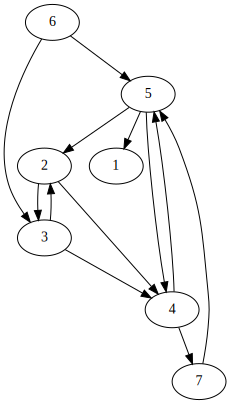

In [ ]:
import graphviz as gv
graph = gv.Digraph("nombre")

n = len(G)
for u in range(n):
  graph.node(str(u), Vertices[u])

for u in range(n):
  for v in G[u]:
    graph.edge(str(u), str(v))

print(graph)
graph

### Clase con el profe

In [ ]:
import heapq as hq
import math

def a_star(G, s, t, h):
    n = len(G)
    g = [math.inf]*n #Arreglo de vértices (Infinitos)
    visited = [False]*n #Arreglo de visitados, siempre es -1 o negativo
    f = [math.inf]*n
    path = [-1]*n

    g[s] = 0 #Qué ess?
    f[s] = h[s] #Qué es???
    q = [] #la cola de prioridad
    hq.heappush(q, (f[s], s))

    while q: 
      _, n = hq.heappop(q) #
      if not visited[n]: 
          visited[n] = True
          if n == t: #Se detiene cuando se encuentra a t
              break
          for v, w in G[n]:
              if not visited[v] and g[n] + w < g[v]: #Es como el dijkstra con esta diferencia (#.)
                  #path[v] = n
                  g[v] = g[n] + w
                  f[v] = g[v] + h[v] #. <---- Esta es la diferencia xD
                  hq.heappush(q, (f[v], v))
    return path

In [ ]:
import graphviz as gv

def drawGraph(G, path=[], h=[], directed=False):
    g = gv.Digraph("nombre") if directed else gv.Graph("nombre")
    n = len(G)

    for u, hi in enumerate(h):
        g.node(str(u), f"{u}({hi})")

    done = set()
    for v, u in enumerate(path):
        if u != -1:
            g.edge(str(u), str(v), dir = "forwar", penwith="2", color="orange")
            done.add((u, v))
            done.add((v, u))
    for u in range(n):
        g.node(str(u))
        for v, w in G[u]:
            if not (u, v) in done:
                done.add((u, v))
                done.add((v, u))
                g.edge(str(u), str(v), str(w))
    return g


In [ ]:
%%file x.in
1 1 5 1 6 2
0 1 2 1 5 2 6 1 7 2
1 1 3 1 6 2 7 1 8 2
2 1 4 1 7 2 8 1 9 2 
3 1 8 2 9 1

Overwriting x.in


In [ ]:
with open("x.in") as f:
  G = []
  for line in f:
      if line == "-\n":
          G.append([])
      else:
          G.append([int(x) for x in line.split()])  

In [ ]:
def manhattan(a, b):
    x0, y0 = a
    x1, y1 = b
    return abs(x0 - 1) + abs(y0 - y1)

In [ ]:
n = 6
G = [[] for i in range(n*n)]
end = (5,5)
h = []
for i in range(n):
    for j in range(n):
        idx = i*n + j
        nbrs = [(i-1, j-1, 2), (i-1, j, 1), (i-1, j+1, 2), ##Posiciones, esquinas siempre son 2 por el algoritmo del Grafo con forma de malla
                (  i, j-1, 1),              (  i, j+1, 1),
                (i+1, j-1, 2), (i+1, j, 1), (i+1, j+1, 2)]
        for i0, j0, w in nbrs: 
            if(i0 < 0 or i0 >= n or j0 < 0 or j0 >= n):
                continue
            idx0 = i0 * n + j0
            G[idx].append((idx0, w))
        h.append(manhattan((i, j), end))
        


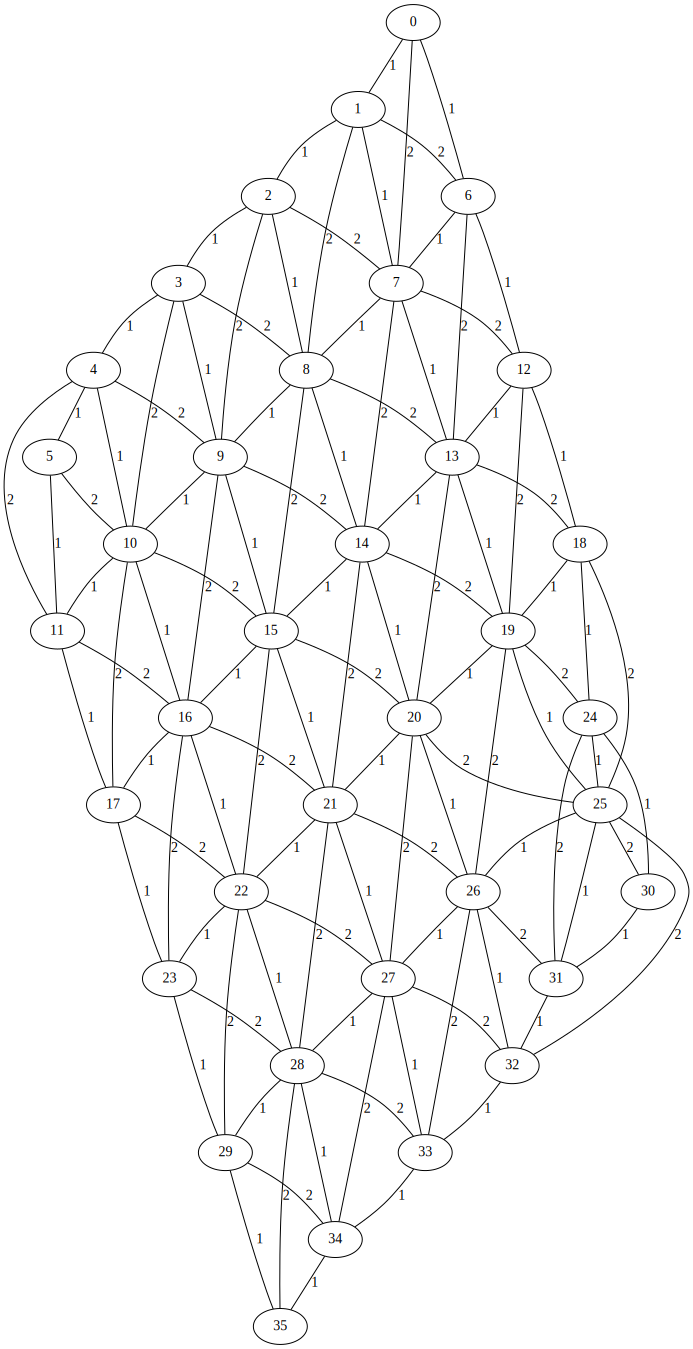

In [ ]:
drawGraph(G)

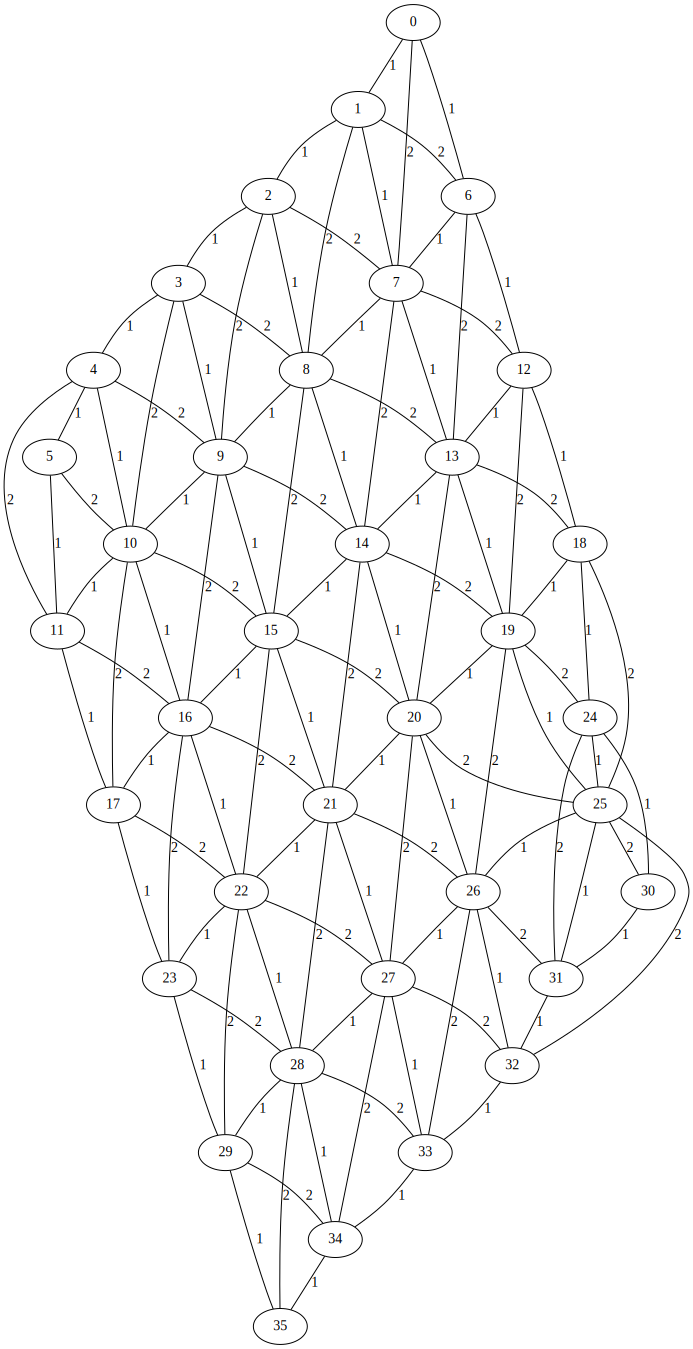

In [ ]:
drawGraph(G, directed = False)

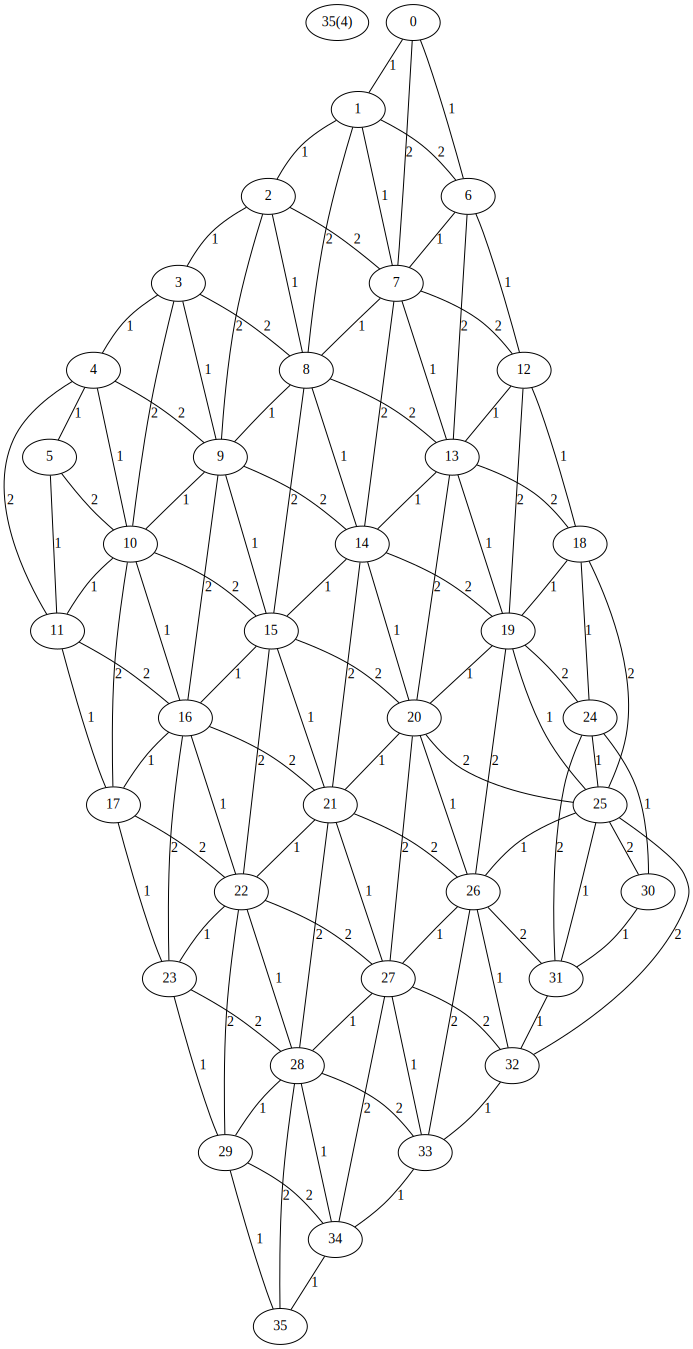

In [ ]:
drawGraph(G, h=h)

### Ejercicio 1 sem 2

In [ ]:
import random
a = list(range(1,20))
random.shuffle(a)
print(a)

[17, 10, 8, 4, 1, 16, 12, 19, 7, 13, 2, 14, 3, 9, 11, 5, 6, 15, 18]


In [ ]:
def Bubblesort(a):
    n = len(a)

    for i in range(n):
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
    return a

In [ ]:
b = Bubblesort(a)
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


### Ejercicio 2 sem 2

In [ ]:
def solve(x0, a: list):
    res = 0.0
    for i, ai in enumerate(reversed(a)):
        res += ai * x0 ** i   # ** es potencia 
        print(f'f(x0) = {ai} x {x0} ^ {i}')             
    return res
solve(2, [10, 20, 0, 15, 5, 50])

f(x0) = 50 x 2 ^ 0
f(x0) = 5 x 2 ^ 1
f(x0) = 15 x 2 ^ 2
f(x0) = 0 x 2 ^ 3
f(x0) = 20 x 2 ^ 4
f(x0) = 10 x 2 ^ 5


760.0

### Ejercicio 4 sem 2

In [ ]:
def ida(bote, orilla, compras):
    n = len(compras)
    

In [ ]:
compras = ["Cabra", "Lobo", "Col"]
bote = ["Granjero"]
orilla = []
solved = False
cont = 0

while not solved:
    cont+=1
    print(f'Iteración: {cont}')
    print(f'Compras: {compras}')
    print(f'bote: {bote}')
    print(f'orilla: {orilla}')
    if len(orilla) == 3:
        solved = True
    else:
      for i in range(len(compras)):
          if compras[i] == 'Cabra':
              bote.append(compras[i])
              compras.pop(i)
              print(f'bote: {bote}')
              orilla.append(bote[1])
              bote.pop(1)
              print(f'bote: {bote}')
              print(f'orilla: {orilla}')
              break
          elif compras[i] == 'Lobo':
              bote.append(compras[i])
              compras.pop(i)
              print(f'bote: {bote}')
              orilla.append(bote[1])
              bote.pop(1)
              print(f'bote: {bote}')
              print(f'orilla: {orilla}')
              bote.append(orilla[0])
              orilla.pop(0)
              print(f'bote: {bote}')
              print(f'orilla: {orilla}')
              break
          else:
              compras.append(bote[1])
              bote.pop(1)
              print(f'bote: {bote}')
              print(f'orilla: {orilla}')
              bote.append(compras[i])
              compras.pop(i)
              orilla.append(bote[1])
              bote.pop(1)
              print(f'bote: {bote}')
              print(f'orilla: {orilla}')
              break
         


Iteración: 1
Compras: ['Cabra', 'Lobo', 'Col']
bote: ['Granjero']
orilla: []
bote: ['Granjero', 'Cabra']
bote: ['Granjero']
orilla: ['Cabra']
Iteración: 2
Compras: ['Lobo', 'Col']
bote: ['Granjero']
orilla: ['Cabra']
bote: ['Granjero', 'Lobo']
bote: ['Granjero']
orilla: ['Cabra', 'Lobo']
bote: ['Granjero', 'Cabra']
orilla: ['Lobo']
Iteración: 3
Compras: ['Col']
bote: ['Granjero', 'Cabra']
orilla: ['Lobo']
bote: ['Granjero']
orilla: ['Lobo']
bote: ['Granjero']
orilla: ['Lobo', 'Col']
Iteración: 4
Compras: ['Cabra']
bote: ['Granjero']
orilla: ['Lobo', 'Col']
bote: ['Granjero', 'Cabra']
bote: ['Granjero']
orilla: ['Lobo', 'Col', 'Cabra']
Iteración: 5
Compras: []
bote: ['Granjero']
orilla: ['Lobo', 'Col', 'Cabra']


### Quicksort

In [ ]:
import random

In [ ]:
def particion(array):
    n = len(array)
    pivote = array[0]
    izq = [] #Van los elementos menores
    der = [] #Van los elementos mayores

    for i in range(1, n):
        if array[i] < pivote: #Si la pos actual es menor q el pivote
            izq.append(array[i]) #Se agrega al arreglo de la izq (menores)
        else:
            der.append(array[i])
    return izq, pivote, der

def quick_sort(array):
    if len(array) < 2:
        return array
    izq, pivote, der = particion(array)
    return quick_sort(izq) +[pivote]+ quick_sort(der)

 
 
array = [i+1 for i in range(100)] #Empieza de 1 hasta 100
random.shuffle(array)
print(f'Array: {array}')
print(quick_sort(array))



 

Array: [91, 58, 37, 77, 47, 57, 3, 95, 33, 2, 7, 96, 51, 28, 81, 44, 76, 12, 24, 21, 93, 84, 94, 31, 14, 8, 86, 11, 69, 32, 83, 9, 36, 30, 46, 87, 17, 1, 54, 49, 82, 62, 43, 98, 29, 72, 34, 74, 26, 55, 97, 61, 79, 100, 39, 89, 53, 59, 50, 92, 67, 6, 15, 18, 80, 35, 71, 65, 10, 78, 4, 27, 70, 85, 23, 52, 20, 25, 16, 63, 41, 13, 88, 45, 60, 90, 66, 40, 64, 56, 22, 73, 99, 75, 38, 48, 42, 5, 68, 19]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
def particion(array):
    n = len(array)
    pivote = array[0]
    izq = []
    der = []

    for i in range(1, n):
        if array[i] < pivote:
            izq.append(array[i])
        else:
            der.append(array[i])
    return izq, pivote, der

def quicksort(array):
    if len(array) < 2:
        return array
    izq, pivote, der = particion(array)

    return quicksort(izq) + [pivote] + quicksort(der)  

array = [i+1 for i in range(100)]
random.shuffle(array)
print(f'Array: {array}')
print(quicksort(array))

Array: [25, 64, 89, 95, 11, 79, 42, 36, 26, 49, 75, 9, 21, 5, 97, 98, 87, 53, 29, 55, 94, 72, 31, 37, 50, 41, 47, 4, 91, 60, 16, 85, 20, 83, 62, 78, 7, 39, 46, 10, 90, 14, 6, 30, 23, 68, 1, 100, 8, 69, 58, 67, 3, 28, 35, 66, 76, 82, 86, 52, 59, 44, 77, 19, 92, 93, 24, 70, 88, 81, 61, 48, 38, 57, 96, 12, 18, 45, 54, 73, 27, 74, 56, 2, 63, 71, 80, 15, 65, 17, 43, 13, 84, 51, 33, 22, 32, 34, 99, 40]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


### Grafos para la PC

In [ ]:
import numpy as np
import graphviz as gv
import random

list = [1 ,2,4]



def randomAM(n, m): #    n = Número de vertices, m = Número de aristas
    # 1 si indice es menor que número d aristas. 
    #Una vez completado el num de aristas se rellena con 0
    g = np.array([random.randint(1, 9) if i < m else 0 for i in range(n*n)]) 
    #g = np.array([1 if i < m else 0 for i in range(n*n)])                                                    
    np.random.shuffle(g)

    return g.reshape((n,n))

g = randomAM(5, 8)


print(g)

[[0 0 0 0 0]
 [0 7 0 0 3]
 [0 9 0 0 0]
 [4 5 0 0 0]
 [7 0 0 5 6]]


In [ ]:
Vertices = []
for i in range(0,5):
    Vertices.append(i)
print(f'Vertices-> {Vertices}')
def listaADY(n, m):
    lst = []
    for i in range(0, n):
        lst.append([(random.randint(0, n-1)) for i in range(random.randint(1, n-2))])
    return lst
lst = listaADY(5, 8)

for l in range(len(lst)):
    print(f'{Vertices[l]} -> {lst[l]}')


Vertices-> [0, 1, 2, 3, 4]
0 -> [1]
1 -> [4, 0, 1]
2 -> [3, 3, 3]
3 -> [0, 2, 2]
4 -> [3, 2, 2]


digraph "Grafo proof" {
	0 [label=0]
	1 [label=1]
	2 [label=2]
	3 [label=3]
	4 [label=4]
	0 -> 1
	1 -> 4
	1 -> 0
	1 -> 1
	2 -> 3
	2 -> 3
	2 -> 3
	3 -> 0
	3 -> 2
	3 -> 2
	4 -> 3
	4 -> 2
	4 -> 2
}


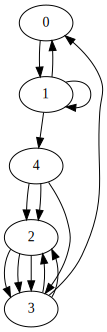

In [ ]:
Grafo = gv.Digraph("Grafo proof")

for u in range(len(lst)):
    Grafo.node(str(u), str(Vertices[u]))

for u in range(len(lst)):
  for v in lst[u]:
    Grafo.edge(str(u), str(v))

print(Grafo)

Grafo

### Ordenamiento topológico 

In [ ]:
def topsort(G):
    n = len(G)
    visited = [False]*n
    t = []

    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        t.insert(0, u)
    for u in range(n):
        if not visited[u]:
            dfs(u)
    return t

In [ ]:
%%file 1.in
2 3
2 3
5 6
7
6
-
7
-

Overwriting 1.in


In [ ]:
with open('1.in') as f:
    G = []
    for line in f:
        if line.startswith('-'):
            G.append([])
        else: 
            G.append([int(x) for x in line.split()])
print(G)
#topsort(G)

[[3, 2], [1, 2], [2, 3], [10, 12], [1, 2], [3, 1], [3, 4], [5, 4], [3, 5], [4, 6], [5, 2], [2, 1], [7, 1], [1, 2], [9, 10], [8, 9]]


### Recuperación semana parcial

Primer ejercicio

In [ ]:
import random

def randomMatrixAdjency(n, m): #n vertices m aristas
    G = [None for _ in range(n)]
    numEdges = [0]*n
    for _ in range(m):
      numEdges[random.randint(0, n-1)] += 1
    vertices = [i for i in range(n)]
    random.shuffle(vertices)
    for u in range(n):
      G[u] = random.sample(vertices, numEdges[u])
    return G

In [ ]:
G = randomMatrixAdjency(10, 20)
for l in G:
  print(l)

[]
[2]
[2]
[0, 3, 2, 5]
[3, 9]
[]
[2, 7, 9, 1]
[3, 2]
[9, 1, 4, 8]
[6, 3]


Primer ejercicio con numpy

In [ ]:
import numpy as np

In [ ]:
def randomAM(n, m):
  G = np.zeros((n*n), dtype = int)
  G[:m] = 1
  random.shuffle(G)
  return G.reshape((n*n))


In [ ]:
print(randomAM(10, 20))

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1]


### PARCIAL PREGUNTA 1

In [ ]:
%%file 1.in
10 12
1 2
3 1
3 4
5 4
3 5
4 6
5 2
2 1
7 1
1 2
9 10
8 9

Overwriting 1.in


In [ ]:
with open('1.in') as f:
    g = []
    for line in f:
        if line.startswith('-'):
            g.append([])
        else: 
            g.append([int(x) for x in line.split()])
print(g)

[[10, 12], [1, 2], [3, 1], [3, 4], [5, 4], [3, 5], [4, 6], [5, 2], [2, 1], [7, 1], [1, 2], [9, 10], [8, 9]]


digraph grafazo {
	1
	1 -> 1
	1 -> 2
	2
	2 -> 3
	2 -> 1
	3
	3 -> 3
	3 -> 4
	4
	4 -> 5
	4 -> 4
	5
	5 -> 3
	5 -> 5
	6
	6 -> 4
	6 -> 6
	7
	7 -> 5
	7 -> 2
	8
	8 -> 2
	8 -> 1
	9
	9 -> 7
	9 -> 1
	10
	10 -> 1
	10 -> 2
	11
	11 -> 9
	11 -> 10
	12
	12 -> 8
	12 -> 9
}


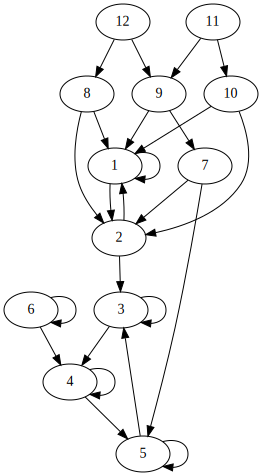

In [ ]:
import graphviz as gv
n = len(g)
#for u in range(n):
 #   print(f"{u} -> {g[u]}")



G = gv.Digraph("grafazo") #Se crea el grafo
for i in range(1,n):#i son los nodos
    G.node(str(i)) #Se agregan los nodos al grafo
    for j in g[i]: #Se recorre lo que está dentro de cada elemento del arragelo (En este caso son los nodos a los q se apuntan) 
        G.edge(str(i), str(j)) #Se colocan las aristas, nodo origen (i) y nodo destino (j)

print(G) #Se imprime la relación del grafo
G #Se dibuja el grafo

In [ ]:
def reverse(G):
  n = len(G)
  Grev = [[] for _ in range(n)]
  for u in range(n):
    for v in G[u]:
      Grev[v].append(u)
  return Grev

In [ ]:
def kosaraju(G):
  n = len(G)
  visited = [False]*n
  f = []

  # (1) producir grafo reverso
  Grev = reverse(G)

  # (2) producir orden de finalización con dfs sobre grafo reverso
  def dfs1(u):
    visited[u] = True
    for v in Grev[u]:
      if not visited[v]:
        dfs1(v)
    f.append(u)

  # (3) producir componentes
  def dfs2(u, cc):
    visited[u] = True
    for v in G[u]:
      if not visited[v]:
        dfs2(v, cc)
    cc.append(u)

  for u in range(n):
    if not visited[u]:
      dfs1(u)

  scc = []
  visited = [False]*n
  for u in reversed(f):
    if not visited[u]:
      cc = []
      dfs2(u, cc)
      scc.append(cc)

  return scc

In [ ]:
kosaraju(g)

[[5, 4, 3], [6], [2, 1], [10], [8], [7], [9], [12], [11], [0]]

## The 3n + 1 problem

In [ ]:
%%file 1.in
20 20
9999 9999
1 9999
340 3000
3000 340
500 101
1 1
9999 9998

Writing 1.in


In [ ]:
def Goto(n):
  #print(n)
  cont = 0
  if n == 1:
    return cont + 1
  elif n % 2 != 0:   #impar
    cont = Goto(3*n + 1)
    return cont + 1
  else:
    cont = Goto(n/2)
    return cont + 1

  return cont

In [ ]:
cycles = []
max_cycle = 0
with open("1.in") as f:
  for n in f:
    #print(n)
    i, j = map(int, n.split())
    x = i 
    y = j
    if i > j:
      i, j = j, i
    between = list(range(i, j+1))
    for index in range(len(between)):
      cycles.append(Goto(between[index]))
    max_cycle = max(cycles) 
    print(f"{x} {y} {max_cycle}")
    cycles.clear()

20 20 8
9999 9999 92
1 9999 262
340 3000 217
3000 340 217
500 101 144
1 1 1
9999 9998 92
